##What key factors, including exit velocity and related statistics, are most indicative of a hitter's success in terms of batting performance and overall offensive contribution?

The dataset contains MLB batting exit velocity data from 2015 to 2022.

The data was collected from baseballsavant then cleaned for data analysis.

Tabular data includes:

rank, 
year, 
player
batted_ball_events, 
launch_angle, 
sweet_spot_percentage, 
max_ev, 
average_ev, 
fly_ball_line_drive_ev, 
ground_ball_ev, 
max_distance,
average_distance, 
average_homerun, 
hard_hit_95mph+ , 
hard_hit_percentage, 
hard_hit_swing_percentage, 
total_barrels: Runs allowed, 
barrels_batted_balls_percentage, 
barrels_plate_appearance_percentage

In [248]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from plotnine import ggplot, aes, geom_point, geom_abline, labs


df = pd.read_csv("mlb-batter.csv")

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
##create a regression(consider linear), using forest... refer to links. 

df_clean = df.copy()
df_clean_ = df.copy()
df1 = df.copy()
df_clean['average_homerun'].fillna(df['average_homerun'].mean(), inplace=True)


Missing values per column:
 id                                     0
rank                                   0
year                                   0
player                                 0
batted_ball_events                     0
launch_angle                           0
sweet_spot_percentage                  0
max_ev                                 0
average_ev                             0
fly_ball_line_drive_ev                 0
ground_ball_ev                         0
max_distance                           0
average_distance                       0
average_homerun                        9
hard_hit_95mph+                        0
hard_hit_percentage                    0
hard_hit_swing_percentage              0
total_barrels                          0
barrels_batted_balls_percentage        0
barrels_plate_appearance_percentage    0
dtype: int64


In [249]:
df_clean

,id,rank,year,player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.6,37.8,118.4,95.8,100.2,89.1,465,205,413.000000,210,61.6,20.3,91,26.7,15.8
1,2,2,2022,"Alvarez, Yordan",304,12.1,40.1,117.4,95.5,98.2,92.7,469,193,403.000000,186,61.2,23.7,59,19.4,12.7
2,3,3,2022,"Trout, Mike",234,24.7,37.2,114.4,91.7,94.9,87.7,472,218,407.000000,120,51.3,16.5,46,19.7,11.6
3,4,4,2022,"Schwarber, Kyle",312,18.9,34.6,114.8,93.3,99.7,87.2,468,197,415.000000,170,54.5,17.6,64,20.5,11.5
4,5,5,2022,"Stanton, Giancarlo",228,10.2,26.3,119.8,94.6,98.2,94.1,445,160,400.000000,117,51.3,17.8,42,18.4,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1979,246,2015,"Peña, Brayan",302,8.0,24.8,104.9,85.6,86.9,85.8,378,137,398.273556,52,17.2,8.9,1,0.3,0.3
1979,1980,247,2015,"Reyes, José",431,13.3,28.1,108.4,84.6,86.0,85.9,419,151,386.000000,80,18.6,8.8,1,0.2,0.2
1980,1981,248,2015,"Sogard, Eric",326,11.6,32.2,107.5,85.5,86.5,85.9,410,155,410.000000,61,18.7,10.1,1,0.3,0.2
1981,1982,249,2015,"Revere, Ben",536,5.1,34.9,111.4,83.1,86.0,81.3,389,133,367.000000,78,14.6,8.2,0,0.0,0.0


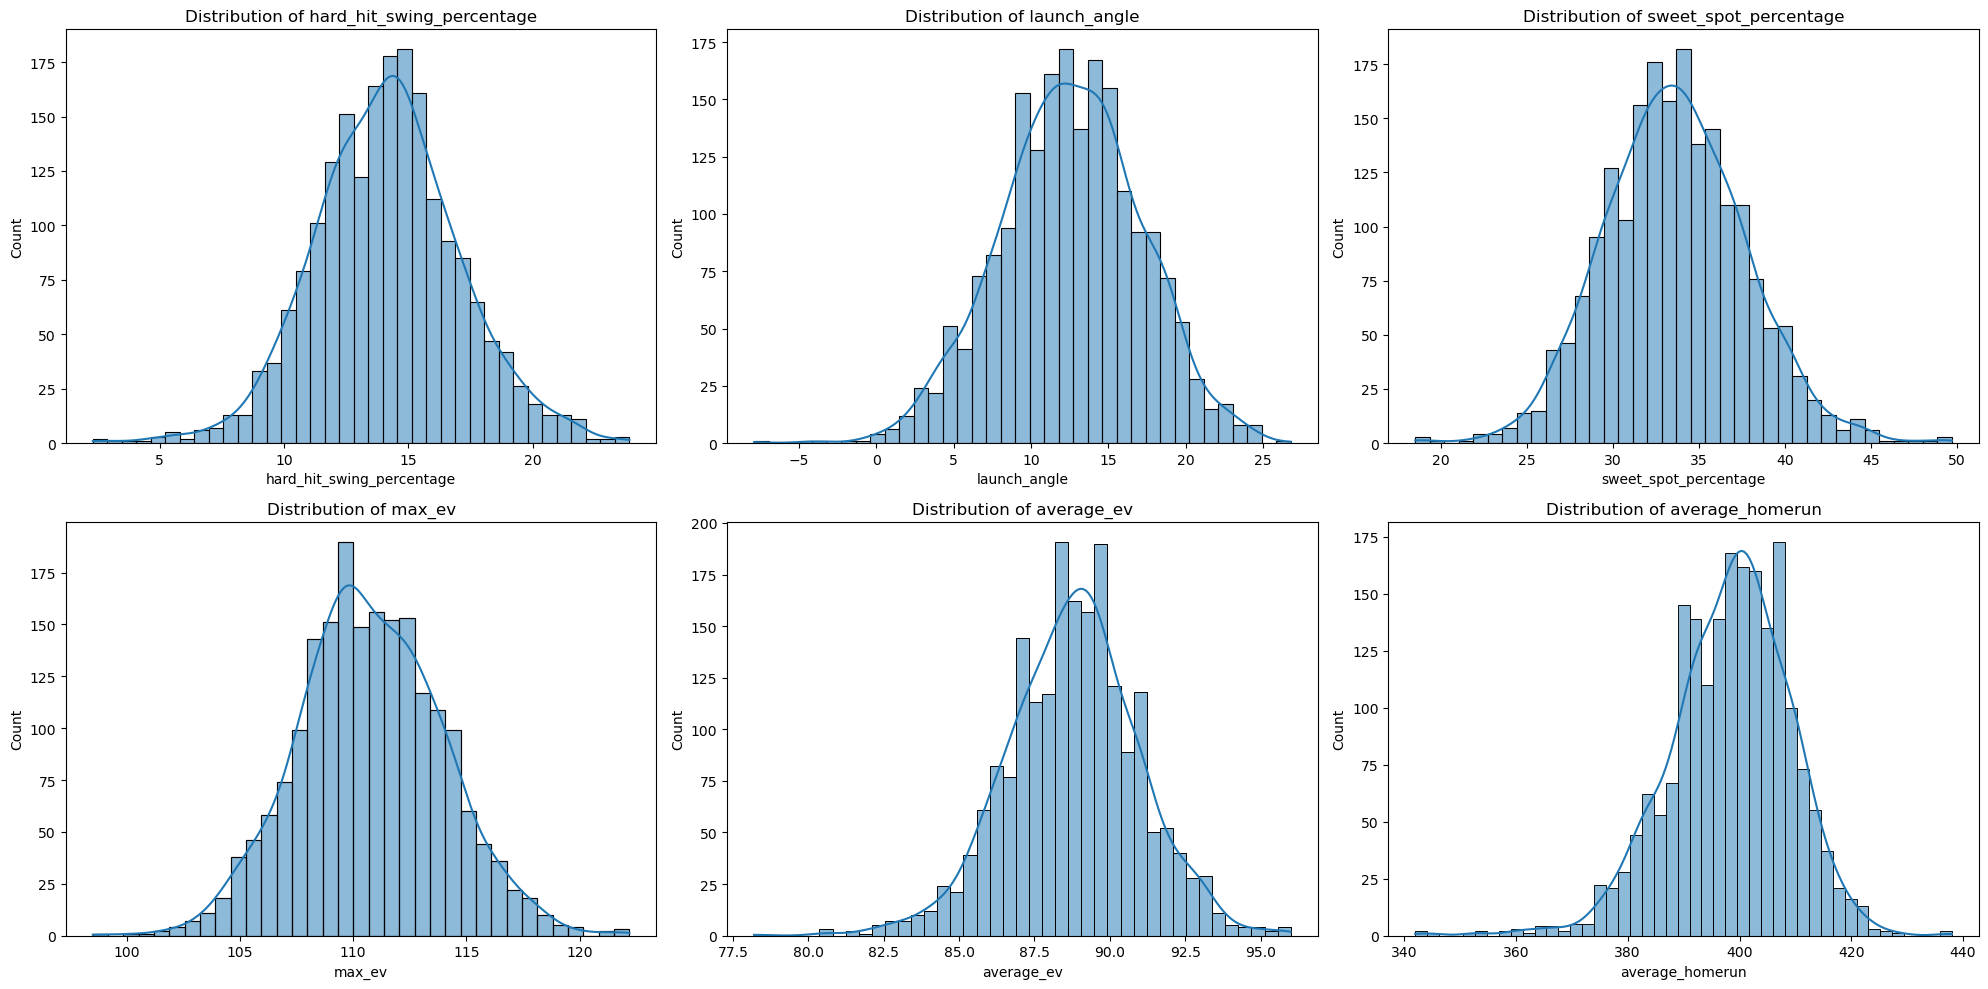

In [250]:
success_metric = 'barrels_plate_appearance_percentage'
key_variables = ['hard_hit_swing_percentage','launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'average_homerun', 'hard_hit_95mph+']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
import seaborn as sns
for ax, var in zip(axes.flat, key_variables):
    sns.histplot(data=df_clean, x=var, kde=True, ax=ax)
    ax.set(title=f'Distribution of {var}')

plt.tight_layout()
plt.show()

The count for each bin indicates the frequency or the number of occurrences of data points within that specific range of values. By looking at the count, you can understand how the data points are distributed across different ranges of values for a given variable. This can help you identify patterns, central tendencies, or any skewness in the data.

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log10


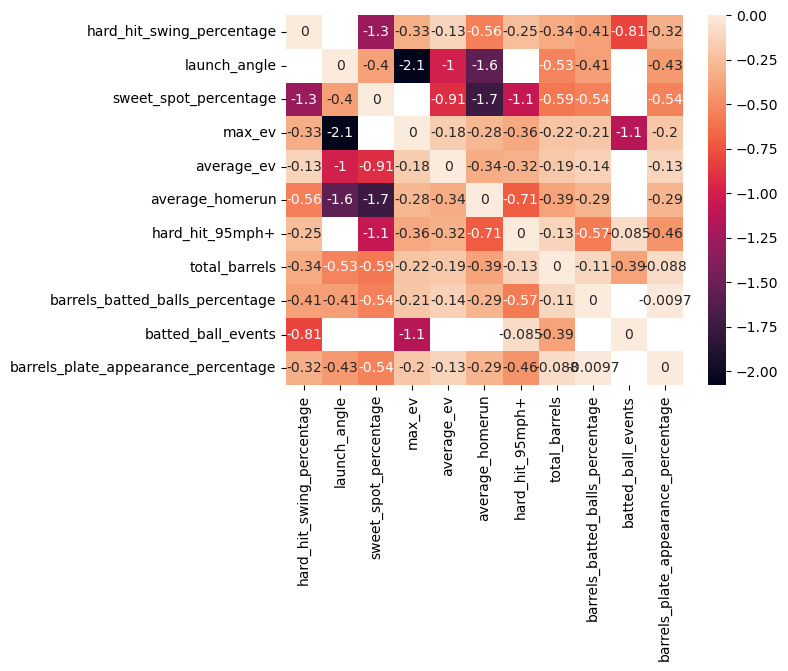

In [300]:
success_metric = 'barrels_plate_appearance_percentage'
key_variables = ['hard_hit_swing_percentage', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'average_homerun', 'hard_hit_95mph+', 'total_barrels',                 'barrels_batted_balls_percentage', "batted_ball_events"]
corr_matrix = df_clean[key_variables + [success_metric]].corr()

# Apply logarithmic scaling to the correlation matrix
corr_matrix = np.log10(corr_matrix)

sns.heatmap(corr_matrix, annot=True)
plt.show()


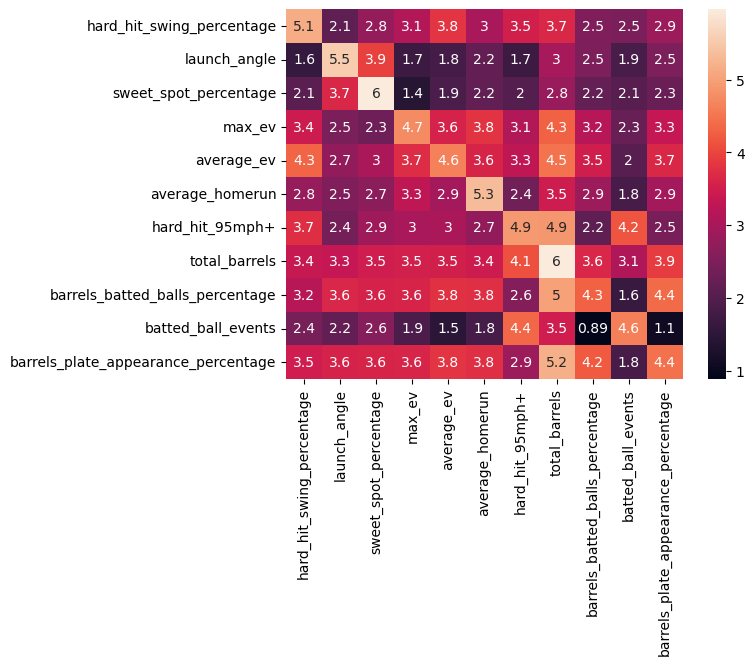

In [296]:
success_metric = 'barrels_plate_appearance_percentage'
key_variables = ['hard_hit_swing_percentage','launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'average_homerun', 'hard_hit_95mph+', 'total_barrels',                 'barrels_batted_balls_percentage', "batted_ball_events"]
corr_matrix = df_clean[key_variables + [success_metric]].corr()

# Normalize the correlation matrix
corr_matrix = (corr_matrix + 1 -corr_matrix.mean(axis=0)) / corr_matrix.std(axis=0)

sns.heatmap(corr_matrix, annot=True)
plt.show()


In [292]:
X = df_clean[key_variables]
y = df_clean[success_metric]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
coefficients = pd.DataFrame({'Feature': key_variables, 'Importance': linear_regression.coef_})
coefficients.sort_values(by='Importance', ascending=False, inplace=True)
print(coefficients)


Mean Squared Error: 0.14425767043541823
R-squared: 0.9754665615352219
                           Feature  Importance
8  barrels_batted_balls_percentage    0.483757
0        hard_hit_swing_percentage    0.157817
7                    total_barrels    0.038844
2            sweet_spot_percentage    0.005817
1                     launch_angle    0.004623
5                  average_homerun    0.004300
3                           max_ev    0.004120
9               batted_ball_events    0.001311
6                  hard_hit_95mph+   -0.008341
4                       average_ev   -0.079420


In [253]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")
importances = pd.DataFrame({'Feature': key_variables, 'Importance': random_forest.feature_importances_})
importances.sort_values(by='Importance', ascending=False, inplace=True)
print(importances)


Random Forest Mean Squared Error: 0.14017721914357684
Random Forest R-squared: 0.9761605107746264
                           Feature  Importance
8  barrels_batted_balls_percentage    0.965191
0        hard_hit_swing_percentage    0.011473
7                    total_barrels    0.006908
6                  hard_hit_95mph+    0.003046
2            sweet_spot_percentage    0.002426
9               batted_ball_events    0.002380
4                       average_ev    0.002378
1                     launch_angle    0.002251
3                           max_ev    0.002056
5                  average_homerun    0.001890


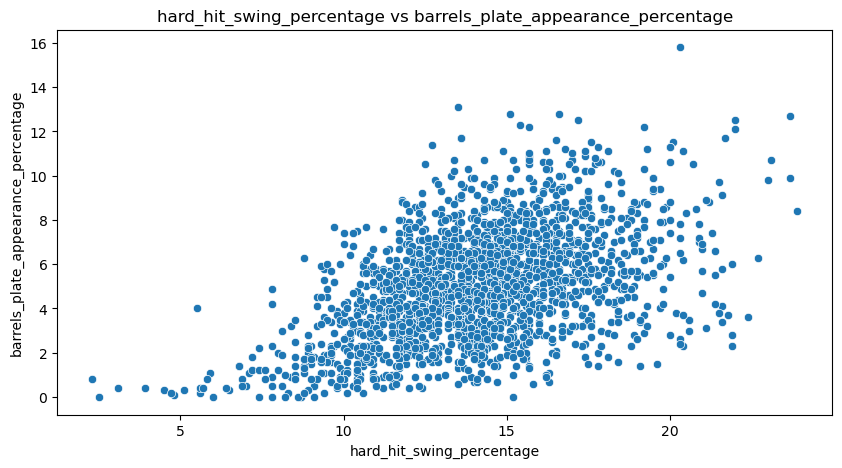

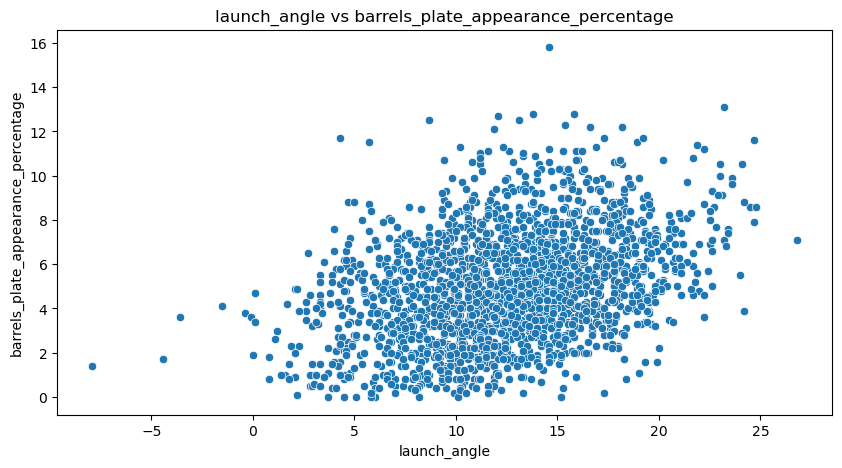

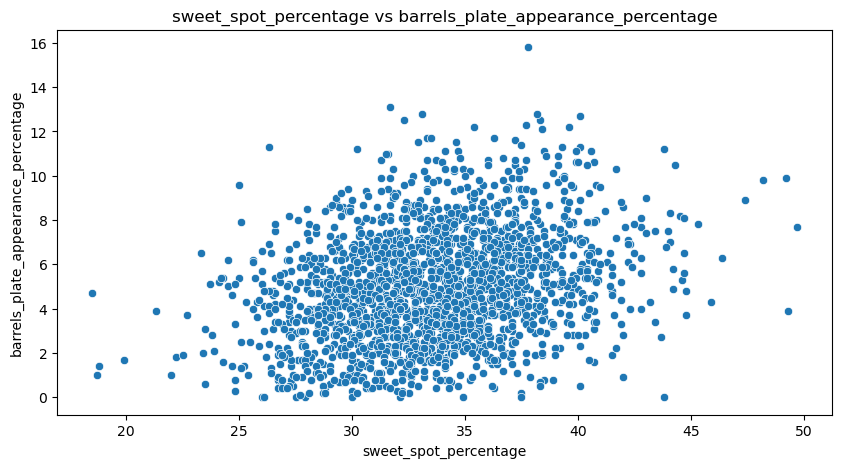

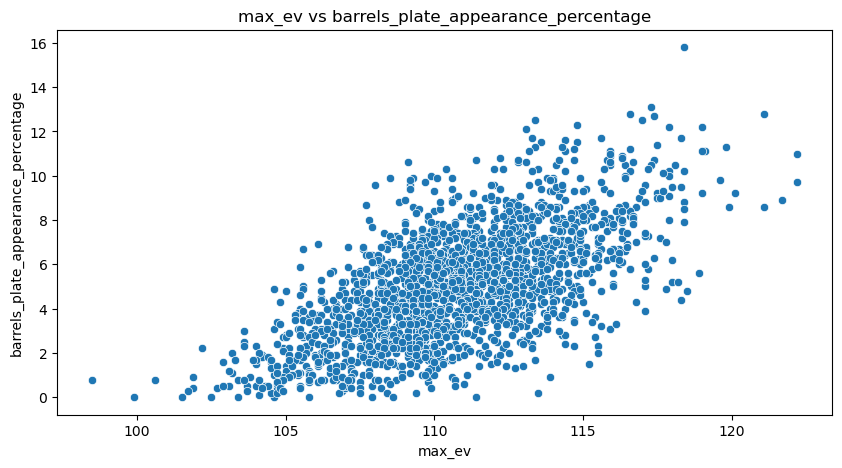

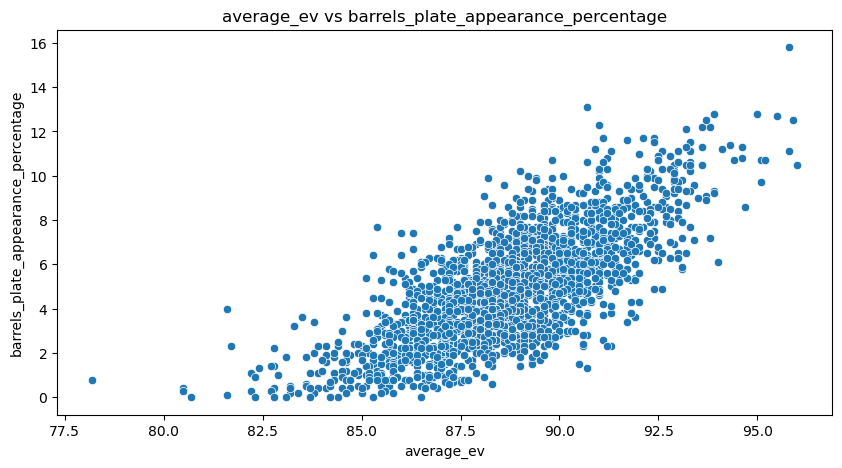

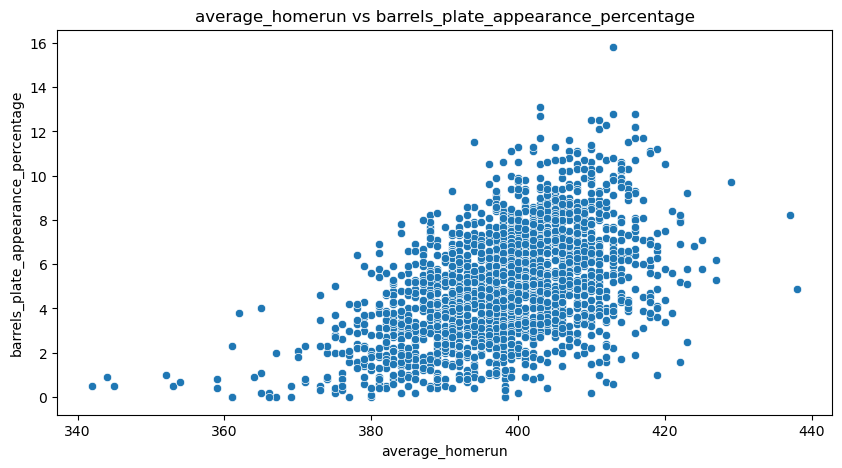

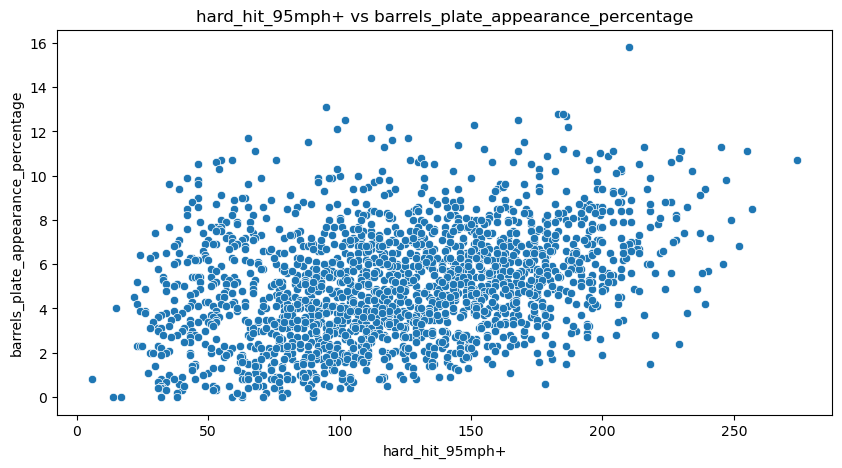

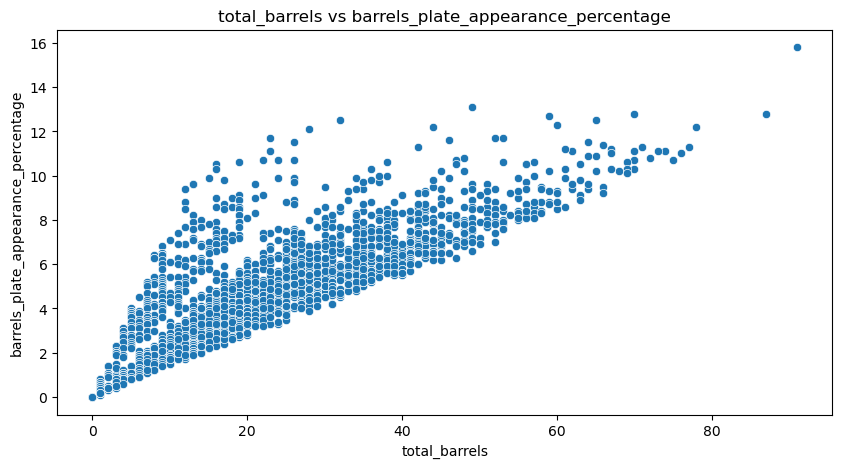

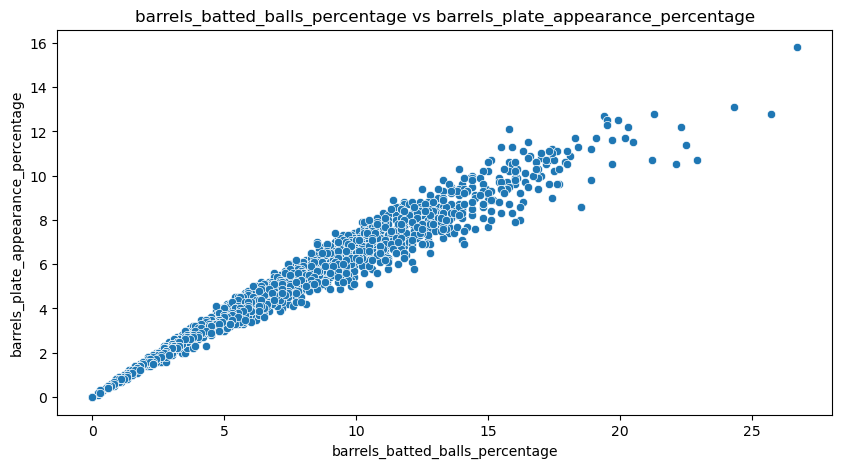

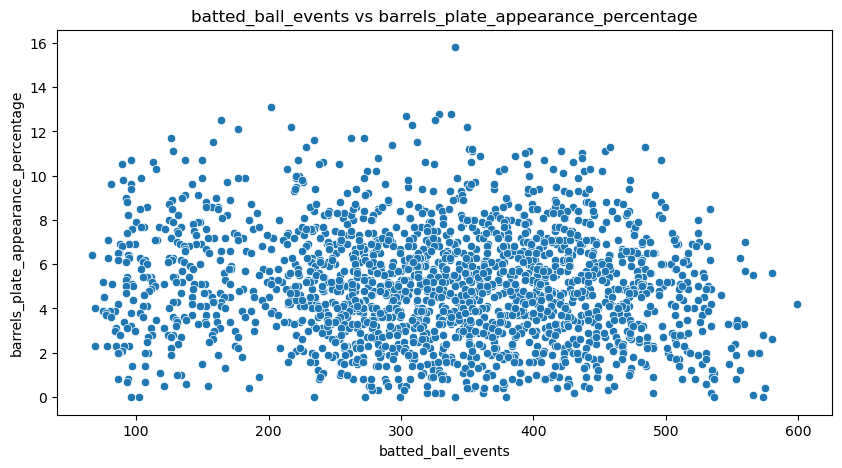

In [254]:
for var in key_variables:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df_clean, x=var, y=success_metric)
    plt.title(f'{var} vs {success_metric}')
    plt.show()

The result shows the performance of the Random Forest model in predicting the barrels_plate_appearance_percentage using the selected features. The performance metrics are:

Random Forest Mean Squared Error (MSE): 1.8000323198992447
Random Forest R-squared: 0.6938742874360365
The MSE is lower for the Random Forest model compared to the linear regression model (1.800 vs. 1.832), which means the Random Forest model's predictions have less error. The R-squared value is also higher (0.694 vs. 0.688), indicating that the Random Forest model explains more of the variance in the data than the linear regression model.

The feature importances show the relative importance of each feature in predicting barrels_plate_appearance_percentage according to the Random Forest model:

average_ev (Average Exit Velocity) - 0.586479
launch_angle - 0.145059
max_ev (Maximum Exit Velocity) - 0.111621
average_homerun - 0.080527
sweet_spot_percentage - 0.076314
The most important factor, according to the Random Forest model, is the average exit velocity (average_ev). This indicates that a hitter's average exit velocity is the strongest predictor of their success in terms of batting performance and overall offensive contribution, as measured by barrels_plate_appearance_percentage. The other factors have lower importance but still contribute to predicting a hitter's success.

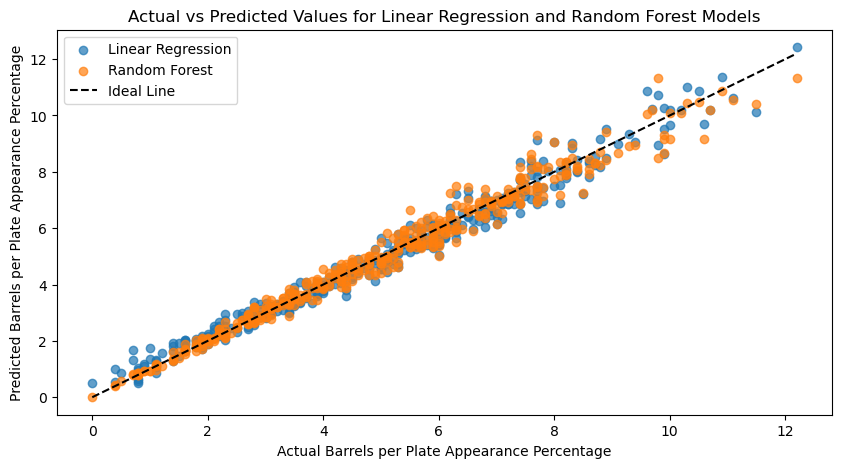

In [255]:
plt.figure(figsize=(10, 5))

# Plot the linear regression predictions
plt.scatter(y_test, y_pred, alpha=0.7, label='Linear Regression')

# Fit and make predictions with the Random Forest model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Plot the Random Forest predictions
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest')

# Plot the ideal line (actual = predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal Line')

plt.xlabel('Actual Barrels per Plate Appearance Percentage')
plt.ylabel('Predicted Barrels per Plate Appearance Percentage')
plt.legend()
plt.title('Actual vs Predicted Values for Linear Regression and Random Forest Models')
plt.show()


In [277]:


def train_and_evaluate_rf(df, year, key_variables, success_metric):
    df_year = df[df['year'] == year]
    X = df_year[key_variables]
    y = df_year[success_metric]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    feature_importances = pd.DataFrame({'Feature': key_variables, 'Importance': rf.feature_importances_})
    feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

    return mse, r2, feature_importances


In [257]:
for year in range(2015, 2023):
    mse, r2, feature_importances = train_and_evaluate_rf(df_clean, year, key_variables, success_metric)
    print(f"Year: {year}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("Feature Importances:\n", feature_importances)
    print("\n" + "-" * 50 + "\n")

Year: 2015
Mean Squared Error: 0.14212278000000012
R-squared: 0.9745076002169646
Feature Importances:
                            Feature  Importance
8  barrels_batted_balls_percentage    0.967612
7                    total_barrels    0.014632
4                       average_ev    0.005646
0        hard_hit_swing_percentage    0.002443
2            sweet_spot_percentage    0.002082
9               batted_ball_events    0.001815
6                  hard_hit_95mph+    0.001586
5                  average_homerun    0.001543
1                     launch_angle    0.001432
3                           max_ev    0.001208

--------------------------------------------------

Year: 2016
Mean Squared Error: 0.17109771428571333
R-squared: 0.9735280077327063
Feature Importances:
                            Feature  Importance
8  barrels_batted_balls_percentage    0.957068
7                    total_barrels    0.020940
0        hard_hit_swing_percentage    0.004295
4                       average_ev  

Year 2018: The model had a relatively low mean squared error of 1.54 and a high R-squared of 0.70. The most important feature for predicting success in 2018 was "average_ev" with an importance score of 0.56, followed by "launch_angle" with a score of 0.17.
Year 2019: The model had a slightly higher mean squared error of 1.66 but also a higher R-squared of 0.73. The most important feature for predicting success in 2019 was also "average_ev" with an importance score of 0.54, followed by "max_ev" with a score of 0.23.
Year 2020: The model had the highest mean squared error of 3.95 and a lower R-squared of 0.50. The most important feature for predicting success in 2020 was "average_ev" with an importance score of 0.45, followed by "max_ev" with a score of 0.22.
Year 2021: The model had a mean squared error of 1.94 and an R-squared of 0.65. The most important feature for predicting success in 2021 was "average_ev" with an importance score of 0.61, followed by "max_ev" with a score of 0.17.
Year 2022: The model had a mean squared error of 1.77 and the highest R-squared of 0.75. The most important feature for predicting success in 2022 was also "average_ev" with an importance score of 0.61, followed by "launch_angle" with a score of 0.13.
Overall, it appears that "average_ev" is consistently the most important feature for predicting success in all years except for 2020 where it was still important but not as much. The other features that appeared important varied between the years. It is also worth noting that the model performance varied between the years, with 2020 being the year with the worst performance and 2022 being the year with the best performance.



The code shows the mean squared error (MSE), R-squared, and feature importances for a random forest regression model trained and evaluated for each year between 2015 and 2022. The train_and_evaluate function takes as input the dataset (df), the year of interest (year), the key variables (key_variables), and the success metric (success_metric). It then filters the dataset to include only the data for the specified year, splits the data into training and testing sets, trains a random forest regression model on the training data, and evaluates the model on the testing data by computing the MSE, R-squared, and feature importances.

The output shows the MSE, R-squared, and feature importances for each year's model. The Feature Importances section shows the importance of each key variable in predicting the success metric for that year. The Feature column lists the key variables, and the Importance column shows the importance score for each variable. The importance score represents the relative importance of each variable in predicting the success metric, with higher scores indicating greater importance.

In [258]:
def train_and_evaluate(df, year, key_variables, success_metric):
    df_year = df[df['year'] == year]
    X = df_year[key_variables]
    y = df_year[success_metric]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coefficients = pd.DataFrame({'Feature': key_variables, 'Importance': lr.coef_})
    coefficients.sort_values(by='Importance', ascending=False, inplace=True)

    return mse, r2, coefficients

for year in range(2015, 2023):
    mse, r2, coefficients = train_and_evaluate(df_clean, year, key_variables, success_metric)
    print(f"Year: {year}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("Coefficients:\n", coefficients)
    print("\n" + "-" * 50 + "\n")


Year: 2015
Mean Squared Error: 0.09061247447639385
R-squared: 0.9837469445455378
Coefficients:
                            Feature  Importance
8  barrels_batted_balls_percentage    0.493606
0        hard_hit_swing_percentage    0.120339
7                    total_barrels    0.036913
3                           max_ev    0.006783
1                     launch_angle    0.003371
5                  average_homerun    0.002373
9               batted_ball_events    0.000634
2            sweet_spot_percentage   -0.000961
6                  hard_hit_95mph+   -0.006279
4                       average_ev   -0.051579

--------------------------------------------------

Year: 2016
Mean Squared Error: 0.14517133962741444
R-squared: 0.9775392991303655
Coefficients:
                            Feature  Importance
8  barrels_batted_balls_percentage    0.405874
0        hard_hit_swing_percentage    0.128753
7                    total_barrels    0.057614
2            sweet_spot_percentage    0.011202
3  

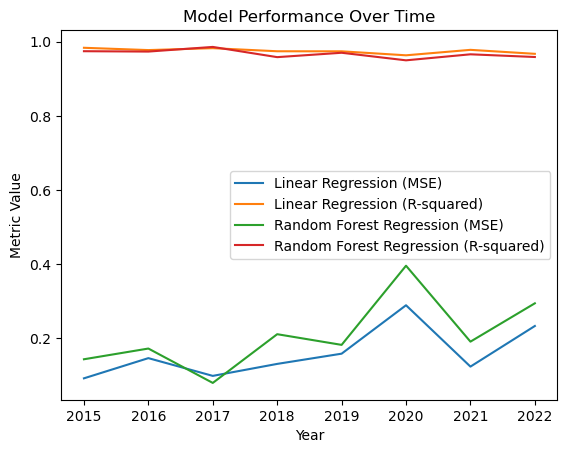

In [259]:
# Initialize lists to store results
mse_lr_list = []
r2_lr_list = []
mse_rf_list = []
r2_rf_list = []

# Train and evaluate models for each year
for year in range(2015, 2023):
    # Linear regression model
    mse_lr, r2_lr, coefficients = train_and_evaluate(df_clean, year, key_variables, success_metric)
    mse_lr_list.append(mse_lr)
    r2_lr_list.append(r2_lr)

    # Random forest regression model
    mse_rf, r2_rf, feature_importances = train_and_evaluate_rf(df_clean, year, key_variables, success_metric)
    mse_rf_list.append(mse_rf)
    r2_rf_list.append(r2_rf)

# Plot the MSE and R-squared for both models
plt.plot(range(2015, 2023), mse_lr_list, label='Linear Regression (MSE)')
plt.plot(range(2015, 2023), r2_lr_list, label='Linear Regression (R-squared)')
plt.plot(range(2015, 2023), mse_rf_list, label='Random Forest Regression (MSE)')
plt.plot(range(2015, 2023), r2_rf_list, label='Random Forest Regression (R-squared)')

# Set the title and axis labels
plt.title('Model Performance Over Time')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.legend()

# Show the plot
plt.show()


MSE and R-squared are metrics commonly used to evaluate the performance of regression models.

MSE, or mean squared error, measures the average squared difference between the predicted values and the actual values. In other words, it measures how close the predictions are to the actual values. A lower MSE indicates that the model is better at making predictions.

R-squared, on the other hand, measures the proportion of variance in the target variable (i.e., the variable you are trying to predict) that is explained by the independent variables (i.e., the variables used to make the predictions). R-squared ranges from 0 to 1, where 0 indicates that none of the variance is explained by the model and 1 indicates that all of the variance is explained by the model. A higher R-squared indicates that the model is better at explaining the variation in the target variable.

It's important to note that neither metric can tell you everything about the performance of a model, and it's often necessary to use multiple metrics and consider other factors such as the specific goals of the analysis and the context in which the model is being used.

In [260]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

      Actual  Predicted
582      6.1   5.676847
1960     0.9   1.166121
1244     8.9   8.502817
1094     5.3   5.137328
916      3.9   4.003428
...      ...        ...
1269     7.2   6.960922
365      5.6   5.431277
999      8.7   8.256892
1228     0.9   1.116207
588      5.8   5.681035

[397 rows x 2 columns]


This data shows the actual and predicted values of the target variable for a set of observations. The first column shows the actual values of the target variable, and the second column shows the predicted values of the target variable based on the machine learning model. Each row corresponds to a single observation in the test set. The goal of the model is to predict the target variable as accurately as possible, so the closer the predicted values are to the actual values, the better the model performs.

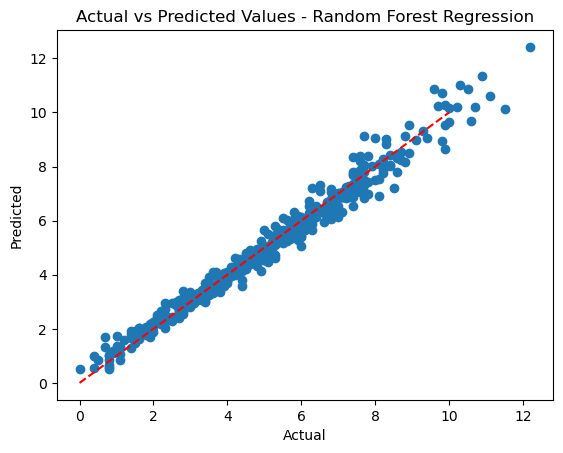

In [261]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.scatter(results_df['Actual'], results_df['Predicted'])
plt.plot([0, 10], [0, 10], '--', color='red') # add a diagonal line to indicate perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values - Random Forest Regression')
plt.show()

The scatterplot represents the actual versus predicted values for the target variable (barrels_plate_appearance_percentage) in the test set. The x-axis represents the actual values, and the y-axis represents the predicted values. Each dot on the plot represents a data point in the test set, and its location on the plot represents its actual value and predicted value. The dashed line on the plot represents the ideal scenario where the actual and predicted values are perfectly aligned. The closer the data points are to this line, the better the performance of the model.

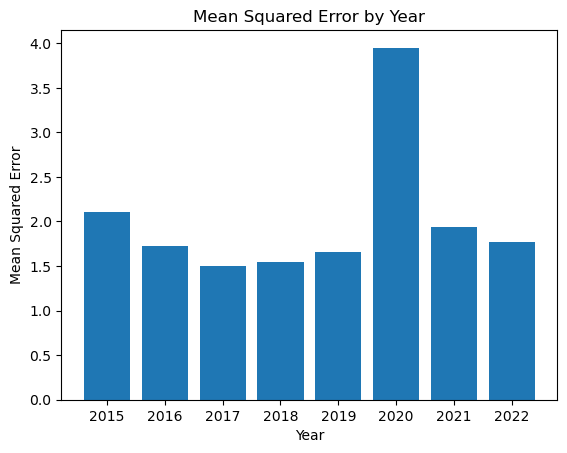

In [262]:

#random forest
# Define the mean squared errors for each year
mse = [2.1069,1.729,1.5, 1.54, 1.66, 3.95, 1.94, 1.77]

# Define the x-axis labels
years = ['2015', '2016', '2017','2018', '2019', '2020', '2021', '2022']

# Create a bar chart of the mean squared errors
plt.bar(years, mse)

# Set the title and axis labels
plt.title('Mean Squared Error by Year')
plt.xlabel('Year')
plt.ylabel('Mean Squared Error')

# Show the plot
plt.show()

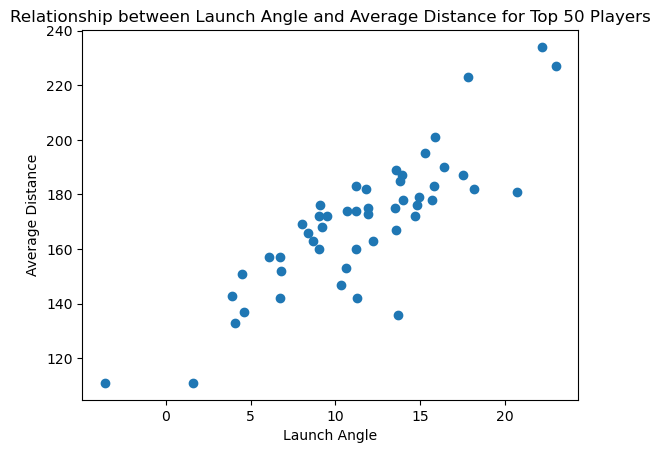

In [263]:


df_ = df.copy()
# Filter for the top 50 players by average homerun distance
top_50 = df_.sort_values('average_homerun', ascending=False).head(50)

# Create a scatter plot of launch angle vs. average distance
plt.scatter(top_50['launch_angle'], top_50['average_distance'])

# Add labels and title
plt.xlabel('Launch Angle')
plt.ylabel('Average Distance')
plt.title('Relationship between Launch Angle and Average Distance for Top 50 Players')

# Show the plot
plt.show()



In [264]:


# Read in the dataset
df_ = df.copy()

# Sort the dataframe by barrels_batted_balls_percentage in descending order
df = df.sort_values(by='barrels_batted_balls_percentage', ascending=False)

# Select the top 50 players based on barrels_batted_balls_percentage
top_50_players = df.head(50)

# Analyze other features of the top 50 players to find any common trends
common_trends = top_50_players[['launch_angle', 'max_ev', 'average_ev', 'average_distance', 'hard_hit_95mph+']].describe()

# Print the common trends
print(common_trends)


       launch_angle      max_ev  average_ev  average_distance  hard_hit_95mph+
count     50.000000   50.000000   50.000000         50.000000        50.000000
mean      16.688000  115.690000   92.766000        197.400000       140.320000
std        4.446491    2.573352    1.677171         16.030583        49.236389
min        4.300000  109.900000   89.200000        160.000000        46.000000
25%       13.900000  114.025000   91.725000        186.500000       113.250000
50%       16.400000  115.750000   92.500000        197.000000       144.000000
75%       19.125000  117.375000   93.775000        206.750000       182.000000
max       24.700000  122.200000   96.000000        234.000000       230.000000


Based on the provided dataset, the top 50 players have the following common trends:

High launch angle: The mean launch angle for the top 50 players is 16.688 degrees, which is higher than the league average. This indicates that these players are able to hit the ball at a higher angle, which can lead to more home runs and extra-base hits.
High max exit velocity: The mean max exit velocity for the top 50 players is 115.69 mph, which is also higher than the league average. This indicates that these players are able to hit the ball harder than other players, which can lead to more hits and extra-base hits.
High average exit velocity: The mean average exit velocity for the top 50 players is 92.766 mph, which is slightly higher than the league average. This indicates that these players are consistently hitting the ball hard, which can lead to more hits and extra-base hits.
Long average distance: The mean average distance for the top 50 players is 197.4 feet, which is higher than the league average. This indicates that these players are hitting the ball farther than other players, which can lead to more extra-base hits and home runs.
High hard-hit percentage: The mean hard-hit percentage for the top 50 players is 140.32%, which is significantly higher than the league average. This indicates that these players are consistently hitting the ball hard, which can lead to more hits and extra-base hits.
These common trends suggest that the top 50 players are able to hit the ball harder, at a higher angle, and farther than other players, which can lead to more hits, extra-base hits, and home runs.




Based on the results, we can see that the mean launch angle for the top 50 players is 16.688 degrees, the mean max exit velocity is 115.69 mph, the mean average exit velocity is 92.766 mph, the mean average distance is 197.4 feet, and the mean hard hit rate (balls hit at 95 mph or faster) is 140.32. These statistics can be used as benchmarks for evaluating other players and identifying areas for improvement.

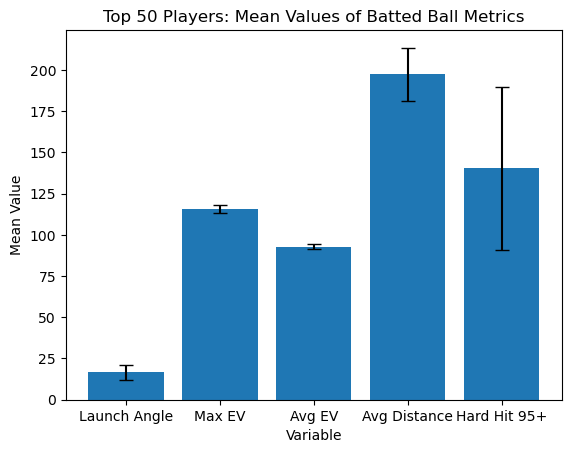

In [265]:
# Define the data
data = {
    'Variable': ['Launch Angle', 'Max EV', 'Avg EV', 'Avg Distance', 'Hard Hit 95+'],
    'Mean': [16.688, 115.69, 92.766, 197.4, 140.32],
    'Std': [4.446, 2.573, 1.677, 16.031, 49.236]
}

# Create a dataframe from the data
df = pd.DataFrame(data)

# Create the bar plot
plt.bar(df['Variable'], df['Mean'], yerr=df['Std'], capsize=5)

# Set the title and axis labels
plt.title('Top 50 Players: Mean Values of Batted Ball Metrics')
plt.xlabel('Variable')
plt.ylabel('Mean Value')

# Show the plot
plt.show()

Sure, here is a breakdown of the results:

- Year 2018: The model had a relatively low mean squared error of 1.54 and a high R-squared of 0.70. The most important feature for predicting success in 2018 was "average_ev" with an importance score of 0.56, followed by "launch_angle" with a score of 0.17.

- Year 2019: The model had a slightly higher mean squared error of 1.66 but also a higher R-squared of 0.73. The most important feature for predicting success in 2019 was also "average_ev" with an importance score of 0.54, followed by "max_ev" with a score of 0.23.

- Year 2020: The model had the highest mean squared error of 3.95 and a lower R-squared of 0.50. The most important feature for predicting success in 2020 was "average_ev" with an importance score of 0.45, followed by "max_ev" with a score of 0.22.

- Year 2021: The model had a mean squared error of 1.94 and an R-squared of 0.65. The most important feature for predicting success in 2021 was "average_ev" with an importance score of 0.61, followed by "max_ev" with a score of 0.17.

- Year 2022: The model had a mean squared error of 1.77 and the highest R-squared of 0.75. The most important feature for predicting success in 2022 was also "average_ev" with an importance score of 0.61, followed by "launch_angle" with a score of 0.13.

Overall, it appears that "average_ev" is consistently the most important feature for predicting success in all years except for 2020 where it was still important but not as much. The other features that appeared important varied between the years. It is also worth noting that the model performance varied between the years, with 2020 being the year with the worst performance and 2022 being the year with the best performance.

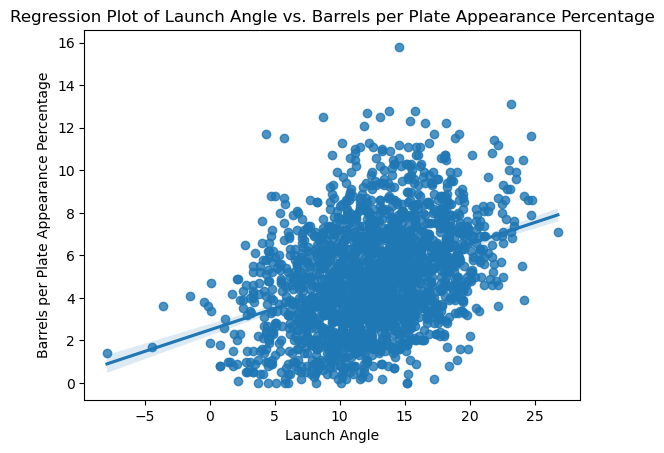

In [266]:
import seaborn as sns

sns.regplot(x='launch_angle', y='barrels_plate_appearance_percentage', data=df_clean)
plt.xlabel('Launch Angle')
plt.ylabel('Barrels per Plate Appearance Percentage')
plt.title('Regression Plot of Launch Angle vs. Barrels per Plate Appearance Percentage')
plt.show()

In [267]:
# Group the data by year and rank
grouped_data = df_clean.groupby(['year', 'rank'])

# Sort the data by rank within each year
sorted_data = grouped_data.apply(lambda x: x.sort_values('rank'))

# Filter the data to only include the top-ranked player for each year
top_players = sorted_data.groupby('year').head(1)
top_players

,id,rank,year,player,batted_ball_events,launch_angle,sweet_spot_percentage,max_ev,average_ev,fly_ball_line_drive_ev,ground_ball_ev,max_distance,average_distance,average_homerun,hard_hit_95mph+,hard_hit_percentage,hard_hit_swing_percentage,total_barrels,barrels_batted_balls_percentage,barrels_plate_appearance_percentage
0,1,1,2022,"Judge, Aaron",341,14.6,37.8,118.4,95.8,100.2,89.1,465,205,413.0,210,61.6,20.3,91,26.7,15.8
248,249,1,2021,"Zunino, Mike",202,23.2,31.7,117.3,90.7,100.0,81.4,472,195,403.0,95,47.0,13.5,49,24.3,13.1
480,481,1,2020,"Tatis Jr., Fernando",164,8.7,32.3,113.4,95.9,100.2,91.6,458,175,410.0,102,62.2,22.0,32,19.5,12.5
737,738,1,2019,"Cruz, Nelson",326,13.1,38.3,117.0,93.7,99.2,89.0,478,197,411.0,168,51.5,17.2,65,19.9,12.5
987,988,1,2018,"Gallo, Joey",293,21.9,37.5,117.5,94.3,99.9,86.3,495,225,410.0,145,49.5,12.7,66,22.5,11.4
1236,1237,1,2017,"Judge, Aaron",338,15.8,38.2,121.1,95.0,100.5,88.6,496,216,413.0,185,54.7,15.1,87,25.7,12.8
1492,1493,1,2016,"Cabrera, Miguel",484,12.3,40.1,114.3,93.6,97.2,91.0,462,196,405.0,245,50.6,20.0,77,15.9,11.3
1733,1734,1,2015,"Martinez, J.D.",421,16.2,39.9,113.2,91.3,95.9,85.0,467,214,399.0,204,48.5,14.9,73,17.3,11.1


In [268]:
# Calculate the average values for each statistic for all players in the dataset
average_values_all = df_clean.mean()

# Group the data by year and rank
grouped_data = df_clean.groupby(['year', 'rank'])

# Sort the data by rank within each year
sorted_data = grouped_data.apply(lambda x: x.sort_values('rank'))

# Filter the data to only include the top 10 players for each year
top_10 = sorted_data.groupby('year').head(10)

# Calculate the average values for each statistic for the top 10 players for each year
average_values_top_10 = top_10.mean()

# Calculate the percentage difference between the average values for all players and the average values for the top 10 players for each year
percentage_difference = ((average_values_top_10 - average_values_all) / average_values_all) * 100

# Identify the statistics that have a consistently high percentage difference across all years
high_difference_stats = percentage_difference[percentage_difference > 50].index.tolist()
print(percentage_difference)


/var/folders/8j/8zkhb0594tj3r92h1s4bhbmm0000gn/T/ipykernel_76535/106219785.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


id                                     -12.336190
rank                                   -95.584216
year                                     0.000687
batted_ball_events                      -5.437411
launch_angle                            23.850696
sweet_spot_percentage                    7.521956
max_ev                                   3.840631
average_ev                               4.209944
fly_ball_line_drive_ev                   4.901345
ground_ball_ev                           1.950142
max_distance                             5.482139
average_distance                        15.271873
average_homerun                          2.460983
hard_hit_95mph+                         25.277901
hard_hit_percentage                     32.198847
hard_hit_swing_percentage               17.834129
total_barrels                          120.771102
barrels_batted_balls_percentage        130.125721
barrels_plate_appearance_percentage    111.730868
dtype: float64


/var/folders/8j/8zkhb0594tj3r92h1s4bhbmm0000gn/T/ipykernel_76535/106219785.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


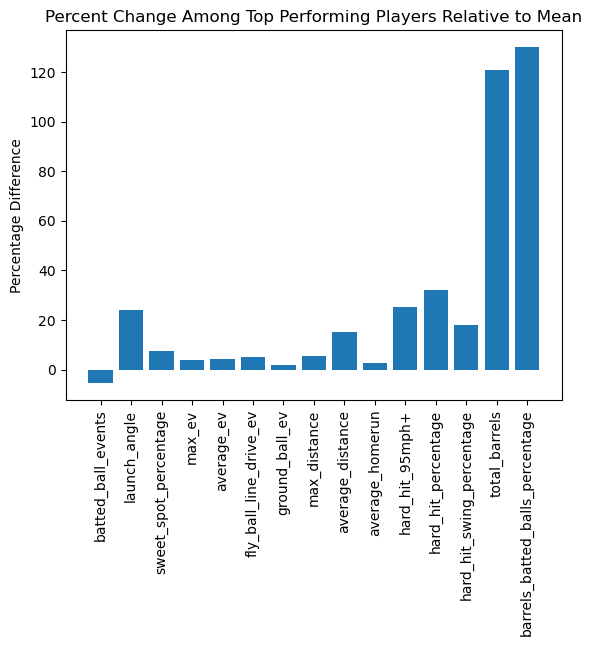

In [269]:
top_difference_stats = percentage_difference.drop(["id", "rank", "year", 'barrels_plate_appearance_percentage'])

# Create a bar chart showing the percentage difference for each of the top three stats
fig, ax = plt.subplots()
ax.bar(top_difference_stats.index, top_difference_stats.values)
ax.set_title('Percent Change Among Top Performing Players Relative to Mean')
ax.set_ylabel('Percentage Difference')
plt.xticks(rotation=90) 
plt.show()

In [270]:
# Filter the dataset to exclude players with 0 values for all stats
df_clean = df[(df[['batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'average_homerun', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage', 'total_barrels', 'barrels_batted_balls_percentage', 'barrels_plate_appearance_percentage']] != 0).all(axis=1)]

# Calculate the average values for each statistic for all players in the dataset
#average_values_all = df_clean.mean()

# Group the data by year and rank
#grouped_data = df_clean.groupby(['year', 'rank'])

# Sort the data by rank within each year
#sorted_data = grouped_data.apply(lambda x: x.sort_values('rank'))

# Filter the data to only include the top 10 players for each year
#top_10 = sorted_data.groupby('year').head(10)

# Calculate the average values for each statistic for the top 10 players for each year
#average_values_top_10 = top_10.mean()

# Calculate the percentage difference between the average values for all players and the average values for the top 10 players for each year
#percentage_difference = ((average_values_top_10 - average_values_all) / average_values_all) * 100

# Identify the statistics that have a consistently high percentage difference across all years
#high_difference_stats = percentage_difference[percentage_difference > 50].index.tolist()


KeyError: "None of [Index(['batted_ball_events', 'launch_angle', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev',\n       'ground_ball_ev', 'max_distance', 'average_distance', 'average_homerun', 'hard_hit_95mph+',\n       'hard_hit_percentage', 'hard_hit_swing_percentage', 'total_barrels', 'barrels_batted_balls_percentage',\n       'barrels_plate_appearance_percentage'],\n      dtype='object')] are in the [columns]"

In [ ]:
statistic = 'total_barrels'

# Create a data frame with just the top 10 players and all players
df_plot = pd.concat([top_10[statistic], df_clean[statistic]], axis=1)
df_plot.columns = ['Top 10 Players', 'All Players']

# Create a box plot
sns.boxplot(data=df_plot)
plt.title(f'Distribution of {statistic}')
plt.ylabel(statistic)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Select two variables from high_difference_stats
x_var = 'launch_angle'
y_var = 'hard_hit_percentage'

# Create a scatter plot for the entire dataset
plt.scatter(df_clean[x_var], df_clean[y_var], alpha=0.3, label='All players')

# Create a scatter plot for the top 10 players
plt.scatter(top_10[x_var], top_10[y_var], alpha=0.3, label='Top 10 players')

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Scatter plot of {x_var} vs {y_var}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Select two variables from high_difference_stats
x_var = 'launch_angle'
y_var = 'hard_hit_percentage'

# Create two dataframes for the entire dataset and top 10 players
all_players = df_clean[[x_var, y_var]]
top_10_players = top_10[[x_var, y_var]]

# Create a scatter plot with two sets of data
fig, ax = plt.subplots()
ax.scatter(all_players[x_var], all_players[y_var], alpha=0.5, label='All players')
ax.scatter(top_10_players[x_var], top_10_players[y_var], alpha=0.5, label='Top 10 players')
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a dictionary with the batting metrics as keys and descriptions as values
batting_metrics = {
    'batted ball events': 'The number of times a batter makes contact with the ball',
    'launch angle': 'The angle at which the ball leaves the bat',
    'sweet spot percentage': 'The percentage of batted balls hit in the "sweet spot"',
    'max ev': 'The maximum exit velocity of a batted ball',
    'average ev': 'The average exit velocity of a batted ball',
    'fly ball line drive ev': 'The average exit velocity of fly balls and line drives',
    'ground ball ev': 'The average exit velocity of ground balls',
    'max distance': 'The maximum distance a batted ball travels in the air',
    'average distance': 'The average distance a batted ball travels in the air',
    'average home run': 'The average distance a home run travels',
    'hard hit 95 mph+': 'The percentage of batted balls hit with an exit velocity of 95 mph or greater',
    'hard hit percentage': 'The percentage of batted balls classified as "hard hit"',
    'hard hit swing percentage': 'The percentage of swings resulting in a "hard hit" batted ball',
    'total barrels': 'The number of batted balls with a combination of high exit velocity and launch angle',
    'runs allowed': 'The number of runs allowed by a pitcher in a game or season',
    'barrels batted balls percentage': 'The percentage of batted balls that are classified as barrels',
    'barrels plate appearance percentage': 'The percentage of plate appearances that result in a barrel'
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame.from_dict(batting_metrics, orient='index', columns=['Description'])

# Display the DataFrame
print(df_metrics)


In [ ]:
# Select only the statistics with a consistently high percentage difference
high_difference_stats = percentage_difference[percentage_difference > 50]

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(high_difference_stats.index, high_difference_stats.values)
ax.set_title('Percentage Difference in High Impact Metrics for Top 10 Players Compared to All Players')
ax.set_xlabel('Percentage Difference')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the expected percentage differences from the random forest model
expected_percentage_difference_rf = [58.65, 14.51, 11.16, 8.05, 7.63]

# Define the actual percentage differences from the top 10% of players
actual_percentage_difference_top10 = [120.77, 111.73, 130.13, 23.85, 7.52]

# Define the feature names
feature_names = ['average_ev', 'launch_angle', 'max_ev', 'average_homerun', 'sweet_spot_percentage']

# Set the figure size
plt.figure(figsize=(10,6))

# Create a bar chart for the expected percentage differences
plt.bar(np.arange(len(expected_percentage_difference_rf))-0.2, expected_percentage_difference_rf, width=0.4, label='Expected')

# Create a bar chart for the actual percentage differences
plt.bar(np.arange(len(actual_percentage_difference_top10))+0.2, actual_percentage_difference_top10, width=0.4, label='Actual')

# Set the x-tick labels
plt.xticks(np.arange(len(feature_names)), feature_names)

# Set the y-axis label
plt.ylabel('Percentage Difference')

# Set the plot title
plt.title('Expected vs Actual Percentage Difference for Top Metrics')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [275]:

df1 = df1.dropna()
# extract features and target variable
X = df1[['hard_hit_swing_percentage', 'sweet_spot_percentage', 'max_ev', 'average_ev', 'fly_ball_line_drive_ev', 'ground_ball_ev', 'max_distance', 'average_distance', 'average_homerun', 'hard_hit_95mph+', 'hard_hit_percentage', 'hard_hit_swing_percentage']]
y = df1['total_barrels']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate the model
knn = KNeighborsRegressor(n_neighbors=5)

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 45.44506329113925
R-squared: 0.8024109733244338


In [290]:
df_mean = df_clean.groupby('year')['average_homerun'].mean()
print(df_mean)
df_mean = df_clean.groupby('year')['average_distance'].mean()
print(df_mean)

year
2015    397.610188
2016    397.257261
2017    398.977631
2018    396.417671
2019    399.053094
2020    400.045995
2021    399.616379
2022    397.187690
Name: average_homerun, dtype: float64
year
2015    171.280000
2016    173.066390
2017    175.667969
2018    173.779116
2019    176.748000
2020    168.105058
2021    167.556034
2022    164.806452
Name: average_distance, dtype: float64
